## Generating one-step-ahead predictions : Task in this exercise is to attempt the impossible and predict the Amazon stock price, earthquakes and milk production

In [2]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy  as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'statsmodels'

In [3]:
amazon = pd.read_csv('https://github.com/nikbearbrown/Art_of_AI/blob/main/CSV/amazon_close.csv?raw=true', index_col = 'date', parse_dates=True)

In [ ]:
amazon.head()

,close
date,
2019-02-08,1588.22
2019-02-07,1614.37
2019-02-06,1640.26
2019-02-05,1658.81
2019-02-04,1633.31


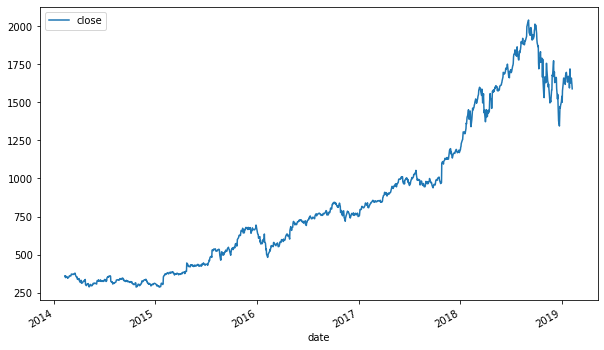

In [ ]:
# plot
fig, ax = plt.subplots()
amazon.plot(ax=ax)
plt.show()

### Run Dicky-fuller test

In [ ]:
results = adfuller(amazon['close'])
print('test statistics ->', results[0])
print('p value ->', results[1])

test statistics -> -1.3446690965326056
p value -> 0.6084966311408377


In [ ]:
# amazon_stationary = amazon['close'].diff().dropna()
# amazon_stationary.head()

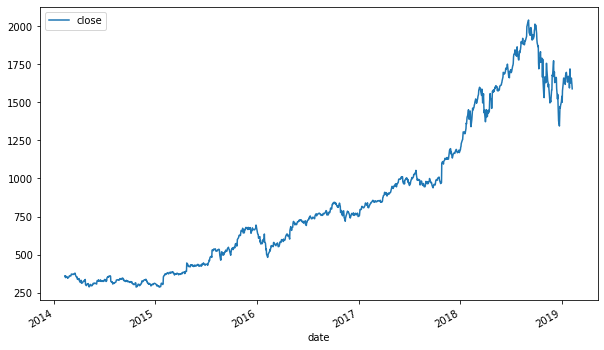

In [ ]:
fig, ax = plt.subplots()
amazon.plot(ax=ax)
plt.show()

In [ ]:
# results = adfuller(amazon_stationary)
# print('test statistics ->', results[0])
# print('p value ->', results[1])

In [ ]:
model = SARIMAX(amazon, order=(1, 1, 1), trend = 'c')
result = model.fit()
# generate predictions
one_step_forecast = result.get_prediction(start = -30)

# extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# get confidence interval of predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

print(mean_forecast)

date
2014-03-24    352.751444
2014-03-21    350.089899
2014-03-20    358.640927
2014-03-19    366.816607
2014-03-18    371.063683
2014-03-17    376.549671
2014-03-14    373.083834
2014-03-13    371.929681
2014-03-12    369.856325
2014-03-11    369.075522
2014-03-10    367.364098
2014-03-07    369.049223
2014-03-06    370.563854
2014-03-05    370.698550
2014-03-04    370.934715
2014-03-03    362.778087
2014-02-28    358.781934
2014-02-27    360.992686
2014-02-26    359.072449
2014-02-25    358.730307
2014-02-24    357.278397
2014-02-21    350.932122
2014-02-20    346.027860
2014-02-19    348.897351
2014-02-18    346.513613
2014-02-14    352.523615
2014-02-13    356.086043
2014-02-12    355.946693
2014-02-11    348.267228
2014-02-10    360.353379
Name: predicted_mean, dtype: float64


## Plotting one-step-ahead predictions

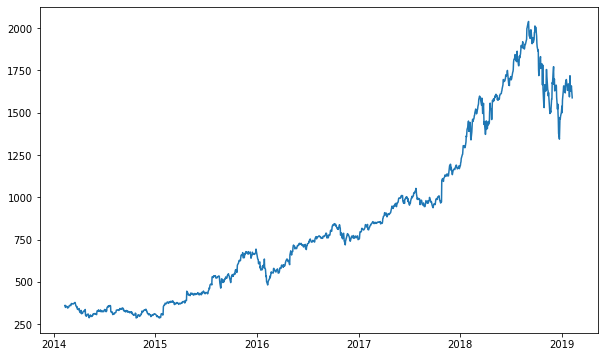

In [ ]:
# plot the amazon data
plt.plot(amazon.index, amazon, label='observed')

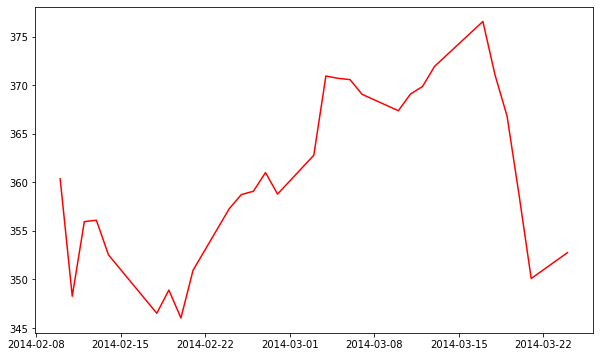

In [ ]:
# plot the mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

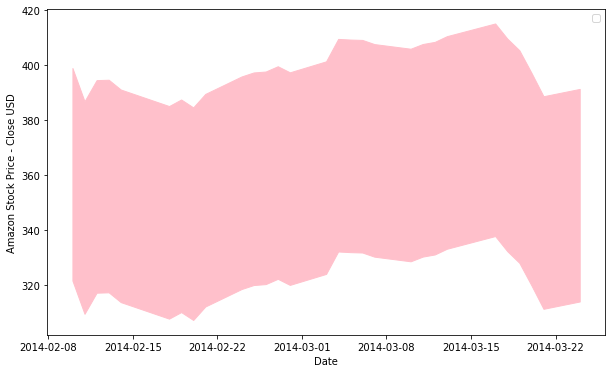

In [ ]:
# shade the area between your confidence limits
plt.fill_between(confidence_intervals.index, lower_limits,
		 upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

### Generating dynamic forecasts

What if you wanted to predict the Amazon stock price, not just for tomorrow, but for next week or next month? This is where dynamical predictions come in.

It is more difficult to make precise long-term forecasts because the shock terms add up. The further into the future the predictions go, the more uncertain. This is especially true with stock data and so you will likely find that your predictions in this exercise are not as precise as those in the last exercise.

In [ ]:
dynamic_forecast = result.get_prediction(start=-30, dynamic=True)

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

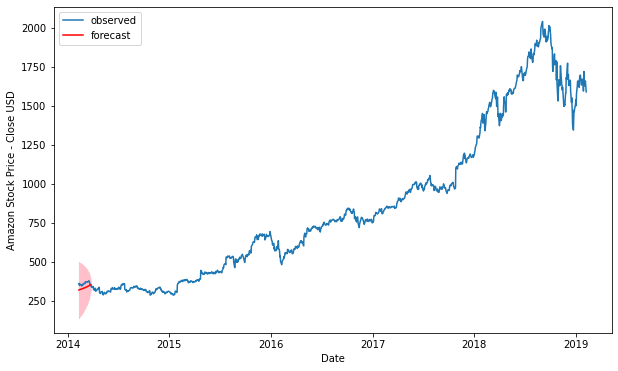

In [ ]:
# Plotting predictions
# plot the amazon data
plt.plot(amazon.index, amazon, label='observed')

# plot your mean forecast
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(confidence_intervals.index, lower_limits, 
         upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

### Differencing and Fitting ARMA

In [ ]:
# Take the first difference of the data
amazon_diff = amazon.diff().dropna()

# Create ARMA(2,2) model
arma = SARIMAX(amazon_diff, order=(2,0,2))

# Fit model
arma_results = arma.fit()

# Print fit summary
print(arma_results.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1258
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -5534.654
Date:                Mon, 20 Mar 2023   AIC                          11079.308
Time:                        00:49:08   BIC                          11104.995
Sample:                             0   HQIC                         11088.962
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1772      0.103     -1.723      0.085      -0.379       0.024
ar.L2          0.7722      0.105      7.352      0.000       0.566       0.978
ma.L1          0.1639      0.098      1.669      0.0

### Unrolling ARMA forecast

Trained arma model will be used in order to forecast the absolute value of the Amazon stocks dataset. Remember that sometimes predicting the difference could be enough; will the stocks go up, or down; but sometimes the absolute value is key.

In [ ]:
# Make arma forecast of next 10 differences
arma_diff_forecast = arma_results.get_forecast(steps=10).predicted_mean

# Integrate the difference forecast
arma_int_forecast = np.cumsum(arma_diff_forecast) 

# Make absolute value forecast
arma_value_forecast = arma_int_forecast + amazon.iloc[-1,0]

# Print forecast
print(arma_value_forecast)

1258    359.999387
1259    360.587838
1260    359.811247
1261    360.403300
1262    359.698675
1263    360.280753
1264    359.633468
1265    360.197681
1266    359.597839
1267    360.139847
Name: predicted_mean, dtype: float64


### Fitting an ARIMA model (easy way)
- Instead of taking the difference, modeling the difference and then integrating we will just use **statsmodel** that will do the hard work for us

In [ ]:
# Create ARIMA(2,1,2) model
arima = SARIMAX(amazon, order=(2,1,2))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

1259    360.000619
1260    360.587973
1261    359.812418
1262    360.403537
1263    359.699775
1264    360.281072
1265    359.634497
1266    360.198069
1267    359.598800
1268    360.140296
Name: predicted_mean, dtype: float64


### AR or MA : Determine model and thier order
- use the ACF and PACF to decide whether some data is best suited to an MA model or an AR model.
- selecting the right model order is of great importance to our predictions.

|      | AR(p)                   |MA(q)                  |ARMA(p, q)               |
|:----:|:-----------------------:|:---------------------:|:-----------------------:|
| ACF  |Tails off                |Cuts off after lag q   |Tails off                |
| PACF |Cuts off after lag p     |Tails off              |Tails off                |


In [ ]:
amazon_diff = amazon.diff(3).dropna()
# amazon_diff

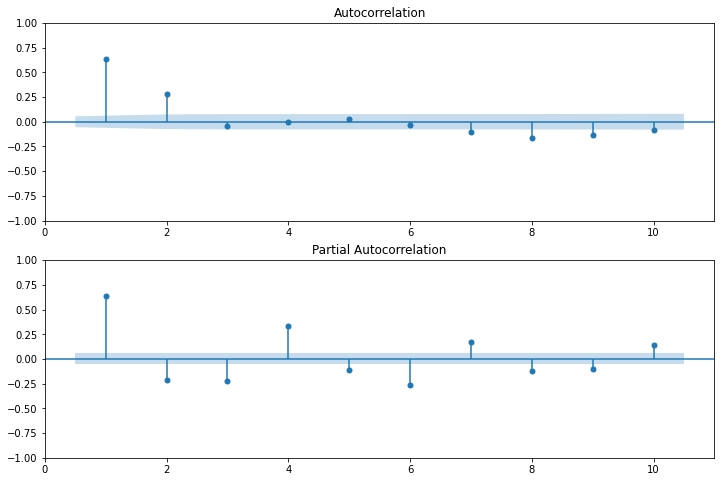

In [ ]:
# Import
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of df
plot_acf(amazon_diff, lags=10, zero=False, ax=ax1)

# Plot the PACF of df
plot_pacf(amazon_diff, lags=10, zero=False, ax=ax2)

plt.show()

### Order of earthquakes

- use the ACF and PACF plots to decide on the most appropriate order to forecast the earthquakes time series.


In [ ]:
earthquakes = pd.read_csv('https://github.com/nikbearbrown/Art_of_AI/blob/main/CSV/earthquakes.csv?raw=true')
earthquakes.date = pd.to_datetime(earthquakes.date)
earthquakes= earthquakes.set_index(earthquakes.date)
earthquakes = earthquakes.drop(['date','Year'], axis=1)
earthquakes.shape

(99, 1)

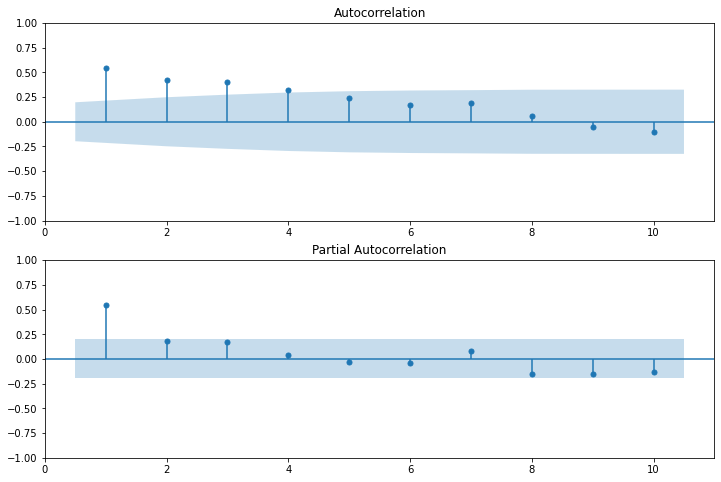

In [ ]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of df
plot_acf(earthquakes, lags=10, zero=False, ax=ax1)

# Plot the PACF of df
plot_pacf(earthquakes, lags=10, zero=False, ax=ax2)

plt.show()

##### This is AR(1) model

In [ ]:
# Instantiate model
model = SARIMAX(earthquakes,order=(1,0,0))

# Train model
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                 SARIMAX(1, 0, 0)   Log Likelihood                -331.323
Date:                  Mon, 20 Mar 2023   AIC                            666.646
Time:                          00:49:10   BIC                            671.836
Sample:                      01-01-1900   HQIC                           668.746
                           - 01-01-1998                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9433      0.029     32.767      0.000       0.887       1.000
sigma2        46.2114      5.459      8.466      0.000      35.513      56.910
===================================================================================
Ljung-Box (L1) (Q):                  13.39   Jarque-Bera (JB):                 4.60
Prob(Q):                              0.00   Prob(JB):                         0.10
Heteroskedasticity (H):               0.78   Skew:                            -0.09
Prob(H) (two-sided):                  0.49   Kurtosis:                         4.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Searching over model order using AIC & BIC
- In order to choose the best order for this model we are going to have to do a search over lots of potential model orders to find the best set.


In [ ]:
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-2
for p in range(0, 3):
  # Loop over q values from 0-2
    for q in range(0, 3):
      	# create and fit ARMA(p,q) model
        model = SARIMAX(earthquakes, order=(p,0,q))
        results = model.fit()
        
        # Append order and results tuple
        order_aic_bic.append((p, q, results.aic, results.bic))

##### We built 9 models in just a few seconds!

### Choosing order with AIC and BIC

- Now that we have performed a search over many model orders, we will evaluate our results to find the best model order.


In [ ]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p','q','AIC','BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values(by='AIC', ascending=True))

# Print order_df in order of increasing BIC
print(order_df.sort_values(by='BIC', ascending=True))

   p  q         AIC         BIC
4  1  1  647.132300  654.917660
5  1  2  648.738566  659.119046
7  2  1  648.842840  659.223319
8  2  2  648.850644  661.826244
6  2  0  656.028374  663.813734
3  1  0  666.645526  671.835765
2  0  2  761.067479  768.852838
1  0  1  799.674173  804.864412
0  0  0  888.429772  891.024892
   p  q         AIC         BIC
4  1  1  647.132300  654.917660
5  1  2  648.738566  659.119046
7  2  1  648.842840  659.223319
8  2  2  648.850644  661.826244
6  2  0  656.028374  663.813734
3  1  0  666.645526  671.835765
2  0  2  761.067479  768.852838
1  0  1  799.674173  804.864412
0  0  0  888.429772  891.024892


##### This time AIC and BIC favored the same model, but this won't always be the case. i,e ARMA(1,1)

### AIC and BIC vs ACF and PACF
- apply an AIC-BIC order search for the earthquakes time series. We decided that this dataset looked like an AR(1) process. We will do a grid search over parameters to see if we get the same results. 


In [ ]:
# Loop over p values from 0-2
order_aic_bic=[]
for p in range(3):
    # Loop over q values from 0-2
    for q in range(3):
      
        try:
            # create and fit ARMA(p,q) model
            model = SARIMAX(earthquakes, order=(p, 0, q))
            results = model.fit()
            
            # Print order and results
#             print(p, q, results.aic, results.bic)
            order_aic_bic.append((p, q, results.aic, results.bic))
            
        except:
            print(p, q, None, None)     

In [ ]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p','q','AIC','BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values(by='AIC', ascending=True))

# Print order_df in order of increasing BIC
print(order_df.sort_values(by='BIC', ascending=True))

   p  q         AIC         BIC
4  1  1  647.132300  654.917660
5  1  2  648.738566  659.119046
7  2  1  648.842840  659.223319
8  2  2  648.850644  661.826244
6  2  0  656.028374  663.813734
3  1  0  666.645526  671.835765
2  0  2  761.067479  768.852838
1  0  1  799.674173  804.864412
0  0  0  888.429772  891.024892
   p  q         AIC         BIC
4  1  1  647.132300  654.917660
5  1  2  648.738566  659.119046
7  2  1  648.842840  659.223319
8  2  2  648.850644  661.826244
6  2  0  656.028374  663.813734
3  1  0  666.645526  671.835765
2  0  2  761.067479  768.852838
1  0  1  799.674173  804.864412
0  0  0  888.429772  891.024892


##### If we look at our printed results we will see that the AIC and BIC both actually favor an ARMA(1,1) model. This isn't what you predicted from the ACF and PACF but notice that the lag 2-3 PACF values are very close to significant, so the ACF/PACF are close to those of an ARMA(p,q) model.

### Mean absolute error
- Obviously, before we use the model to predict, we want to know how accurate our predictions are. The **mean absolute error (MAE)** is a good statistic for this. It is the mean difference between our predictions and the true values.
- calculate the MAE for an ARMA(1,1) model fit to the earthquakes time series

4.755625669941166


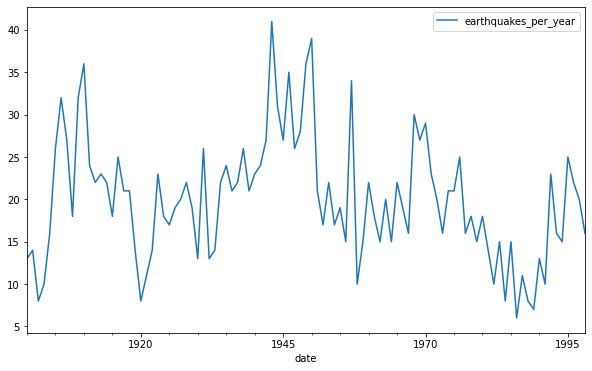

In [ ]:
# Fit model
model = SARIMAX(earthquakes, order=(1,0,1))
results = model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))

# Print mean absolute error
print(mae)

# Make plot of time series for comparison
earthquakes.plot()
plt.show()

### Diagnostic summary statistics
- It is important to know when we need to go back to the drawing board in model design. 
- We will use the residual test statistics in the results summary to decide whether a model is a good fit to a time series.
- Here is a reminder of the tests in the model summary:

<p align="center">
  <img src="./images/tests.PNG" width="350" title="Tests">
</p>



In [ ]:
# Create and fit model
model1 = SARIMAX(earthquakes, order=(3,0,1))
results1 = model1.fit()

# Print summary
print(results1.summary())

                                SARIMAX Results                                 
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                 SARIMAX(3, 0, 1)   Log Likelihood                -320.005
Date:                  Mon, 20 Mar 2023   AIC                            650.010
Time:                          00:49:12   BIC                            662.986
Sample:                      01-01-1900   HQIC                           655.260
                           - 01-01-1998                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8941      0.267      3.355      0.001       0.372       1.416
ar.L2         -0.0612      0.187     -0.328      0.743      -0.427       0.305
ar.L3          0.1529      0.180    

##### Conclusion : They are not correlated and are normally distributed.

### Plot diagnostics
- It is important to know when we need to go back to the drawing board in model design. In this exercise we will use 4 common plots to decide whether a model is a good fit to some data.

<p align="left">
  <img src="./images/plot_diag.PNG" width="350" title="plot_diag">
</p>

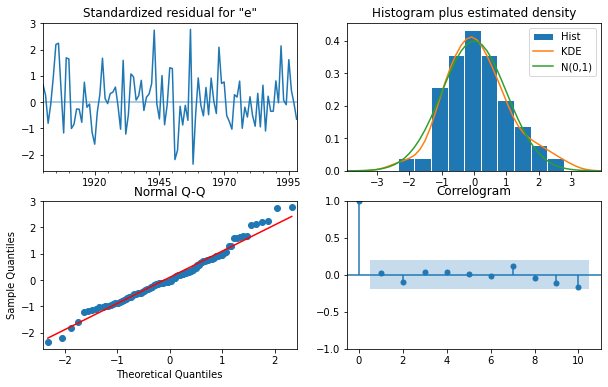

In [ ]:
# Create and fit model
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10.0, 6.0]

model = SARIMAX(earthquakes, order=(1,0,1))
results=model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

## Box- Jenkins

### Identification
- apply to the Box-Jenkins methodology to go from an unknown dataset to a model which is ready to make forecasts.
- The first step of the Box-Jenkins methodology is Identification. use the tools at your disposal to test whether this new time series is stationary.


In [ ]:
earthquakes = pd.read_csv('https://github.com/nikbearbrown/Art_of_AI/blob/main/CSV/earthquakes.csv?raw=tue')
earthquakes = earthquakes.set_index('date').drop('Year', axis=1)
earthquakes.index = pd.to_datetime(earthquakes.index)
earthquakes.tail(3)

,earthquakes_per_year
date,
1996-01-01,22.0
1997-01-01,20.0
1998-01-01,16.0


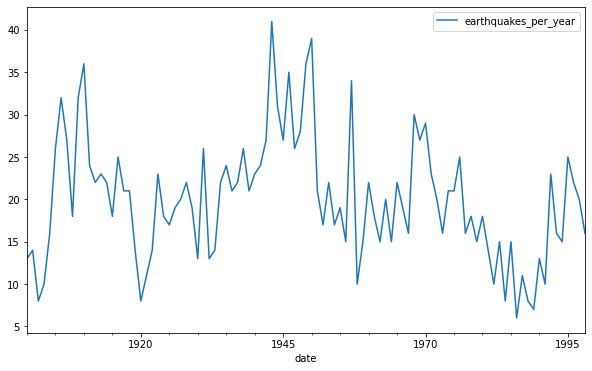

-3.183192251191782
0.02097842525600371


In [ ]:
# Plot time series
earthquakes.plot()
plt.show()

# Run Dicky-Fuller test
result = adfuller(earthquakes.earthquakes_per_year)

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

##### The Dicky-Fuller test says that the series is stationary. We can confirm this when we look at the plot.

#### Identification II
- We learned that the earthquakes time series is stationary without differencing. Now that we have this information we can try and identify what order of model will be the best fit.


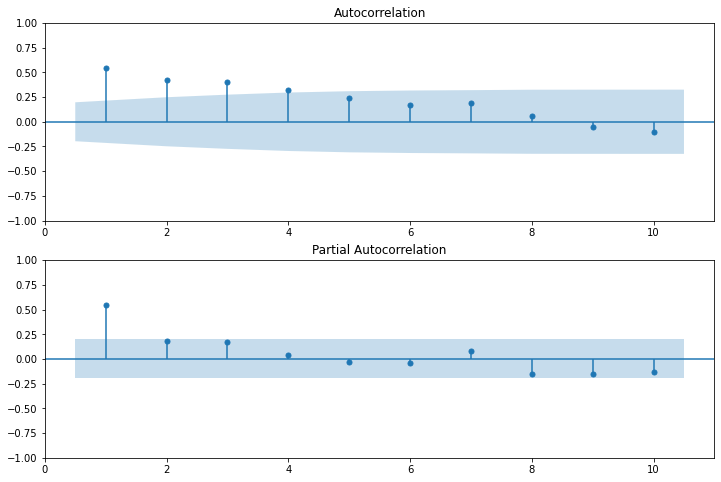

In [ ]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of savings on ax1
plot_acf(earthquakes, lags=10, zero=False, ax=ax1)

# Plot the PACF of savings on ax2
plot_pacf(earthquakes, lags=10, zero=False, ax=ax2)

plt.show()

##### Step one complete! The ACF and the PACF are a little inconclusive for this ones. The ACF tails off nicely but the PACF might be tailing off or it might be dropping off. So it could be an ARMA(p,q) model or a AR(p) model.

### Estimation
-  ACF and PACF were a little inconclusive. The results suggest our data could be an ARMA(p,q) model or could be an imperfect AR(3) model. We will search over models over some model orders to find the best one according to AIC.

In [ ]:
# Loop over p values from 0-3
order_aic_bic=[]
for p in range(4):
    # Loop over q values from 0-3
    for q in range(4):
      
        try:
            # create and fit ARMA(p,q) model
            model = SARIMAX(earthquakes, order=(p, 0, q), trend='c')
            results = model.fit()
            
            # Print order and results
#             print(p, q, results.aic, results.bic)
            order_aic_bic.append((p, q, results.aic, results.bic))
            
        except:
            print(p, q, None, None)    
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p','q','AIC','BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values(by='AIC', ascending=True))

# Print order_df in order of increasing BIC
print(order_df.sort_values(by='BIC', ascending=True))

    p  q         AIC         BIC
11  2  3  638.000291  656.166130
5   1  1  640.456284  650.836763
12  3  0  641.496669  654.472268
6   1  2  642.380868  655.356467
9   2  1  642.409842  655.385441
10  2  2  642.468591  658.039310
8   2  0  642.733854  653.114333
7   1  3  643.062670  658.633389
13  3  1  643.345278  658.915997
4   1  0  643.967677  651.753037
14  3  2  645.190439  663.356278
15  3  3  647.121813  667.882772
3   0  3  647.930561  660.906160
2   0  2  651.733227  662.113706
1   0  1  654.846859  662.632218
0   0  0  676.544359  681.734599
    p  q         AIC         BIC
5   1  1  640.456284  650.836763
4   1  0  643.967677  651.753037
8   2  0  642.733854  653.114333
12  3  0  641.496669  654.472268
6   1  2  642.380868  655.356467
9   2  1  642.409842  655.385441
11  2  3  638.000291  656.166130
10  2  2  642.468591  658.039310
7   1  3  643.062670  658.633389
13  3  1  643.345278  658.915997
3   0  3  647.930561  660.906160
2   0  2  651.733227  662.113706
1   0  1  

#### Diagnostics


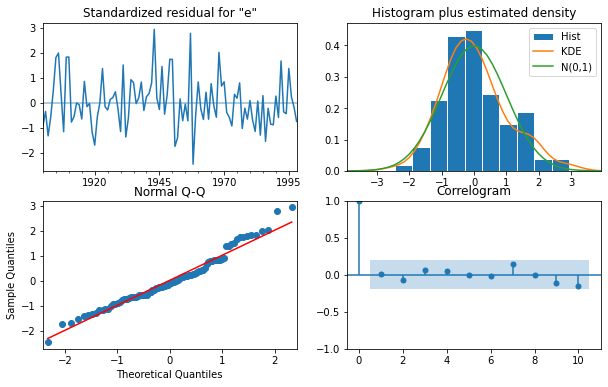

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                 SARIMAX(1, 0, 1)   Log Likelihood                -316.228
Date:                  Mon, 20 Mar 2023   AIC                            640.456
Time:                          00:49:20   BIC                            650.837
Sample:                      01-01-1900   HQIC                           644.656
                           - 01-01-1998                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.3311      1.693      1.968      0.049       0.013       6.649
ar.L1          0.8306      0.084      9.881      0.000       0.666       0.995
ma.L1         -0.4369      0.140     -3.119      0.002      -0.711      -0.162
sigma2        34.6638      4.985      6.953      0.000      24.893      44.435
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 5.51
Prob(Q):                              0.93   Prob(JB):                         0.06
Heteroskedasticity (H):               0.69   Skew:                             0.56
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Create and fit model
model = SARIMAX(earthquakes, order=(1,0,1), trend='c')
results = model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

# Print summary
results.summary()

##### Conclusion : The JB p-value is 0.06, which means we should accept the null hypothesis that the residuals are normally distributed. Also, the histogram and Q-Q plots show that the residuals look normal. 

### Seasonal decompose
- We can think of a time series as being composed of trend, seasonal and residual components. This can be a good way to think about the data when we go about modeling it. If we know the period of the time series we can decompose it into these components.

In [ ]:
milk_production = pd.read_csv('https://github.com/nikbearbrown/Art_of_AI/blob/main/CSV/milk_production.csv?raw=true')
milk_production = milk_production.set_index('date')
milk_production.index = pd.to_datetime(milk_production.index)
milk_production.tail(3)

,pounds_per_cow
date,
1975-10-01,827.0
1975-11-01,797.0
1975-12-01,843.0


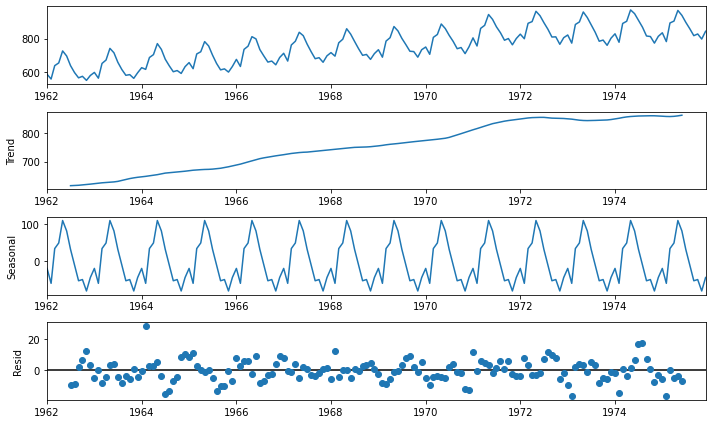

In [ ]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(milk_production, 
                            period=12)

# Plot decomposition
decomp.plot()
plt.show()

##### We have extracted the seasonal cycle and now we can see the trend much more clearly.

# License
All code in this note is available as open source through the MIT license.

All text and images are free to use under the Creative Commons Attribution 3.0 license. https://creativecommons.org/licenses/by/3.0/us/

These licenses let others distribute, remix, tweak, and build upon the work, even commercially, as long as they give credit for the original creation.

Copyright 2021 AI Skunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.